In [200]:
import os 
import sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np

In [201]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [202]:

#Importing Configs
# Define the path where config.py is located
#Mac
os.chdir('/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling')
#Linux
#os.chdir('/home/kwnabors/Documents/GitHub/Finance-ML-Modeling')
config_file_path = os.getcwd()
print(config_file_path)

# Add this path to the sys.path
sys.path.append(config_file_path)

import config

#Configs
database_file = config.database
database_folder = config.database_folder
bert_models = config.bert_models
bert_models_local = config.bert_models_local
Sentiment_models = config.Sentiment_models
finbert_models = config.finbert_models

Body = config.Body
Model = config.Model
Model_Subfolder = f'/{Body} Texts/{Model}'
#Model_Folder = config.texts
Model_Folder = config.Sentiment_models
Model_Folder = Model_Folder + Model_Subfolder
Model_Folder = config.Sentiment_models

Body_2 = config.Body_2
Model_2 = config.Model_2
Model_Subfolder_2 = f'/{Body_2} Texts/{Model_2}'
Model_Folder_2 = config.texts
Model_Folder_2 = Model_Folder_2 + Model_Subfolder_2


/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling


In [203]:
df_sent = pd.read_csv(f"{finbert_models}/{Body}_{Model}_finbert model_line.csv")
df_sent_2 = pd.read_csv(f"{finbert_models}/{Body_2}_{Model_2}_finbert model_line.csv")

df_tone = pd.read_csv(f"{finbert_models}/{Body}_{Model}_finbert model.csv")
df_tone_2 = pd.read_csv(f"{finbert_models}/{Body_2}_{Model_2}_finbert model.csv")

df_tone = df_tone[['date', 'title', 'tone']]
df_tone_2 = df_tone_2[['date', 'title', 'tone']]



In [204]:
df_var = df_sent[['title', 'sentiment']]

df_var = df_var.groupby(['title']).agg(["mean", "median", "var"]).reset_index()
df_var.columns = ['_'.join(col).strip() for col in df_var.columns.values]
df_var = df_var.rename(columns={'title_': 'title'})

In [205]:
df_var_2 = df_sent_2[['title', 'sentiment']]

df_var_2 = df_var_2.groupby(['title']).agg(["mean", "median", "var"]).reset_index()
df_var_2.columns = ['_'.join(col).strip() for col in df_var_2.columns.values]
df_var_2 = df_var_2.rename(columns={'title_': 'title'})


In [206]:

df_tone['tone'] = df_tone['tone'].replace({'positive': 1, 'neutral' : 0, 'negative' : -1})
df_tone_2['tone'] = df_tone_2['tone'].replace({'positive': 1, 'neutral' : 0, 'negative' : -1})

df = df_tone.merge(df_var, on='title', how='inner')
df_2 = df_tone_2.merge(df_var_2, on='title', how='inner')

In [207]:
df_sent = df_sent[['title', 'sentiment']]
df_sent['dup_number'] = df_sent.groupby(['title']).cumcount()+1


print(df_sent.head())
#pivot = df_sent.pivot(index='title', columns='dup_number', values ='sentiment')
#pivot = pd.pivot_table(df_sent, index='title', columns='dup_number', values ='sentiment', fill_value=0)
pivot = pd.pivot_table(df_sent, index='dup_number', columns='title', values ='sentiment', fill_value=None)


                                       title  sentiment  dup_number
0  Modernizing financial services regulation          0        1.00
1  Modernizing financial services regulation          0        2.00
2  Modernizing financial services regulation          1        3.00
3  Modernizing financial services regulation          0        4.00
4  Modernizing financial services regulation          0        5.00


In [208]:
titles_1 = pivot.columns.tolist()

print(titles_1)

sub_var = [] 

for title in titles_1:
    sub_var.append(df_var[df_var['title'] == title]['sentiment_var'].values[0])
    
df_sub_var = pd.DataFrame({'title': titles_1, 'var': sub_var})


var_ts = df_tone.merge(df_sub_var, on='title', how='inner')
print(var_ts.head(-100))
print(len(var_ts))

['"Constrained discretion" and monetary policy', 'A First Step in Dealing with Growing Retirement Costs', 'A Look at Fair Lending through the Lens of the New HMDA Data', "A Regulator's View of Emerging Issues in Community Banking", 'A Retrospective on Business-Cycle Recoveries: Are "Jobless" Recoveries the New Norm?', 'A few thoughts on financial sector and payments activities', 'A look at the banking industry in 2002', 'A perspective on inflation targeting', "A policy in Lampman's tradition: The Community Reinvestment Act", 'A review of economic developments in 2001 and the economic outlook', 'A stabilization policy strategy', 'A supervisory perspective on disaster recovery and business continuity', 'Acceptance of the Eisenhower Medal for Leadership and Service', 'Adam Smith', 'An agenda for bank supervision and regulation', 'An unwelcome fall in inflation?', 'An update on the predatory lending issue', 'Assessing prospects for economic growth in the United States', 'Asset Price Levels

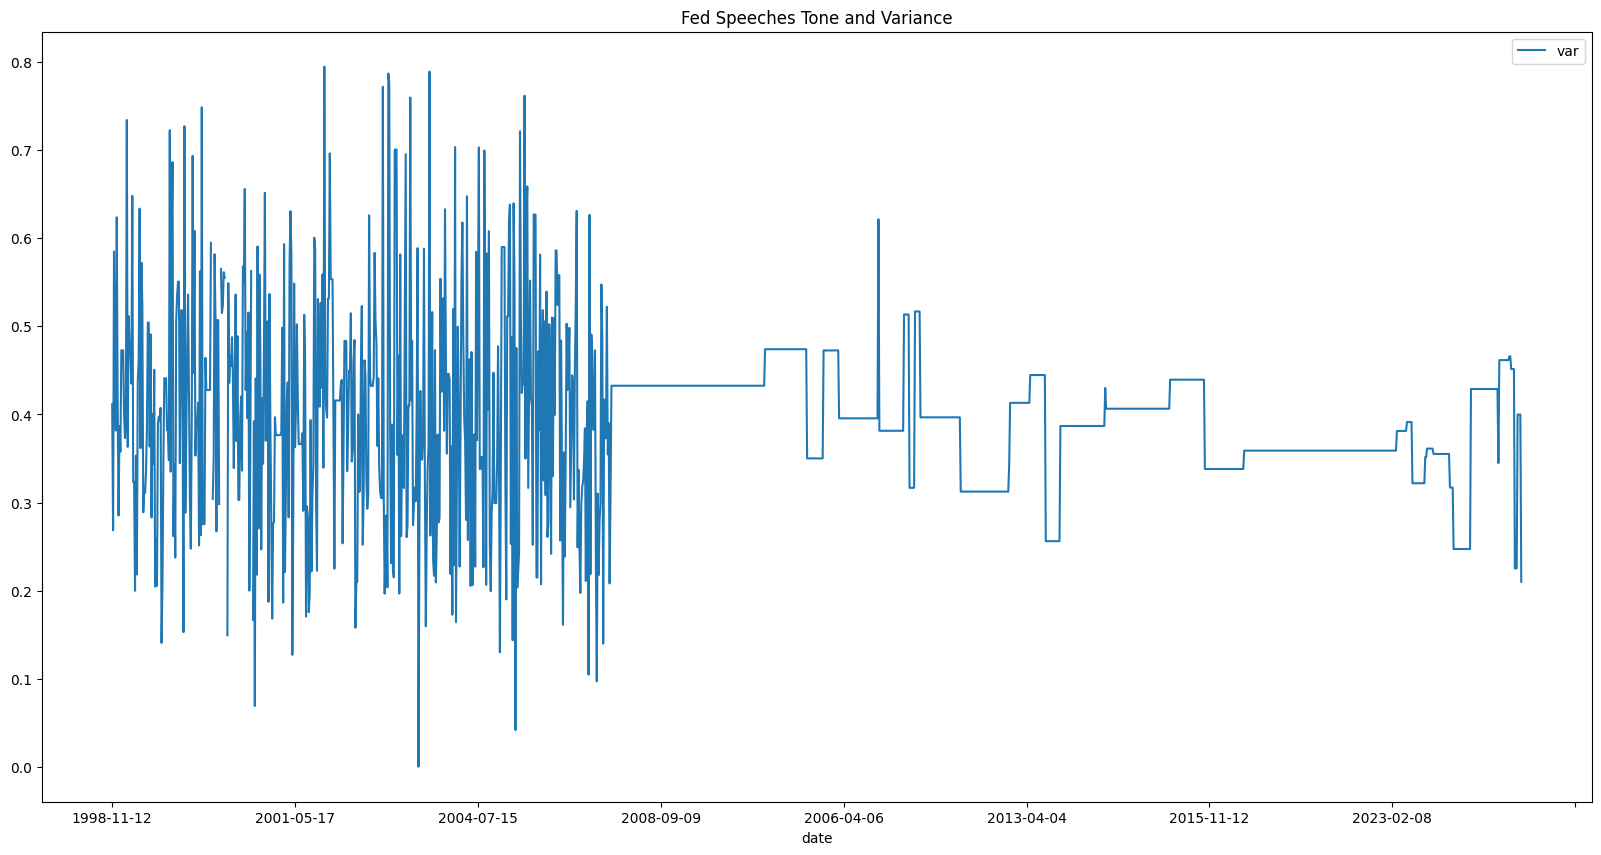

In [209]:
plot = var_ts.plot(x='date', y='var', figsize=(20,10), title = f'{Body} {Model} Tone and Variance')


In [210]:
pivot['mean'] = pivot.mean(axis=1)
pivot['var'] = pivot.var(axis=1)

window = 1500

pivot['rmean'] = pivot['mean'].rolling(window).mean()
pivot['rvar'] = pivot['mean'].rolling(window).var()
pivot['ci'] = 1.96 * np.sqrt(pivot['rvar'] / len(pivot['rvar']))

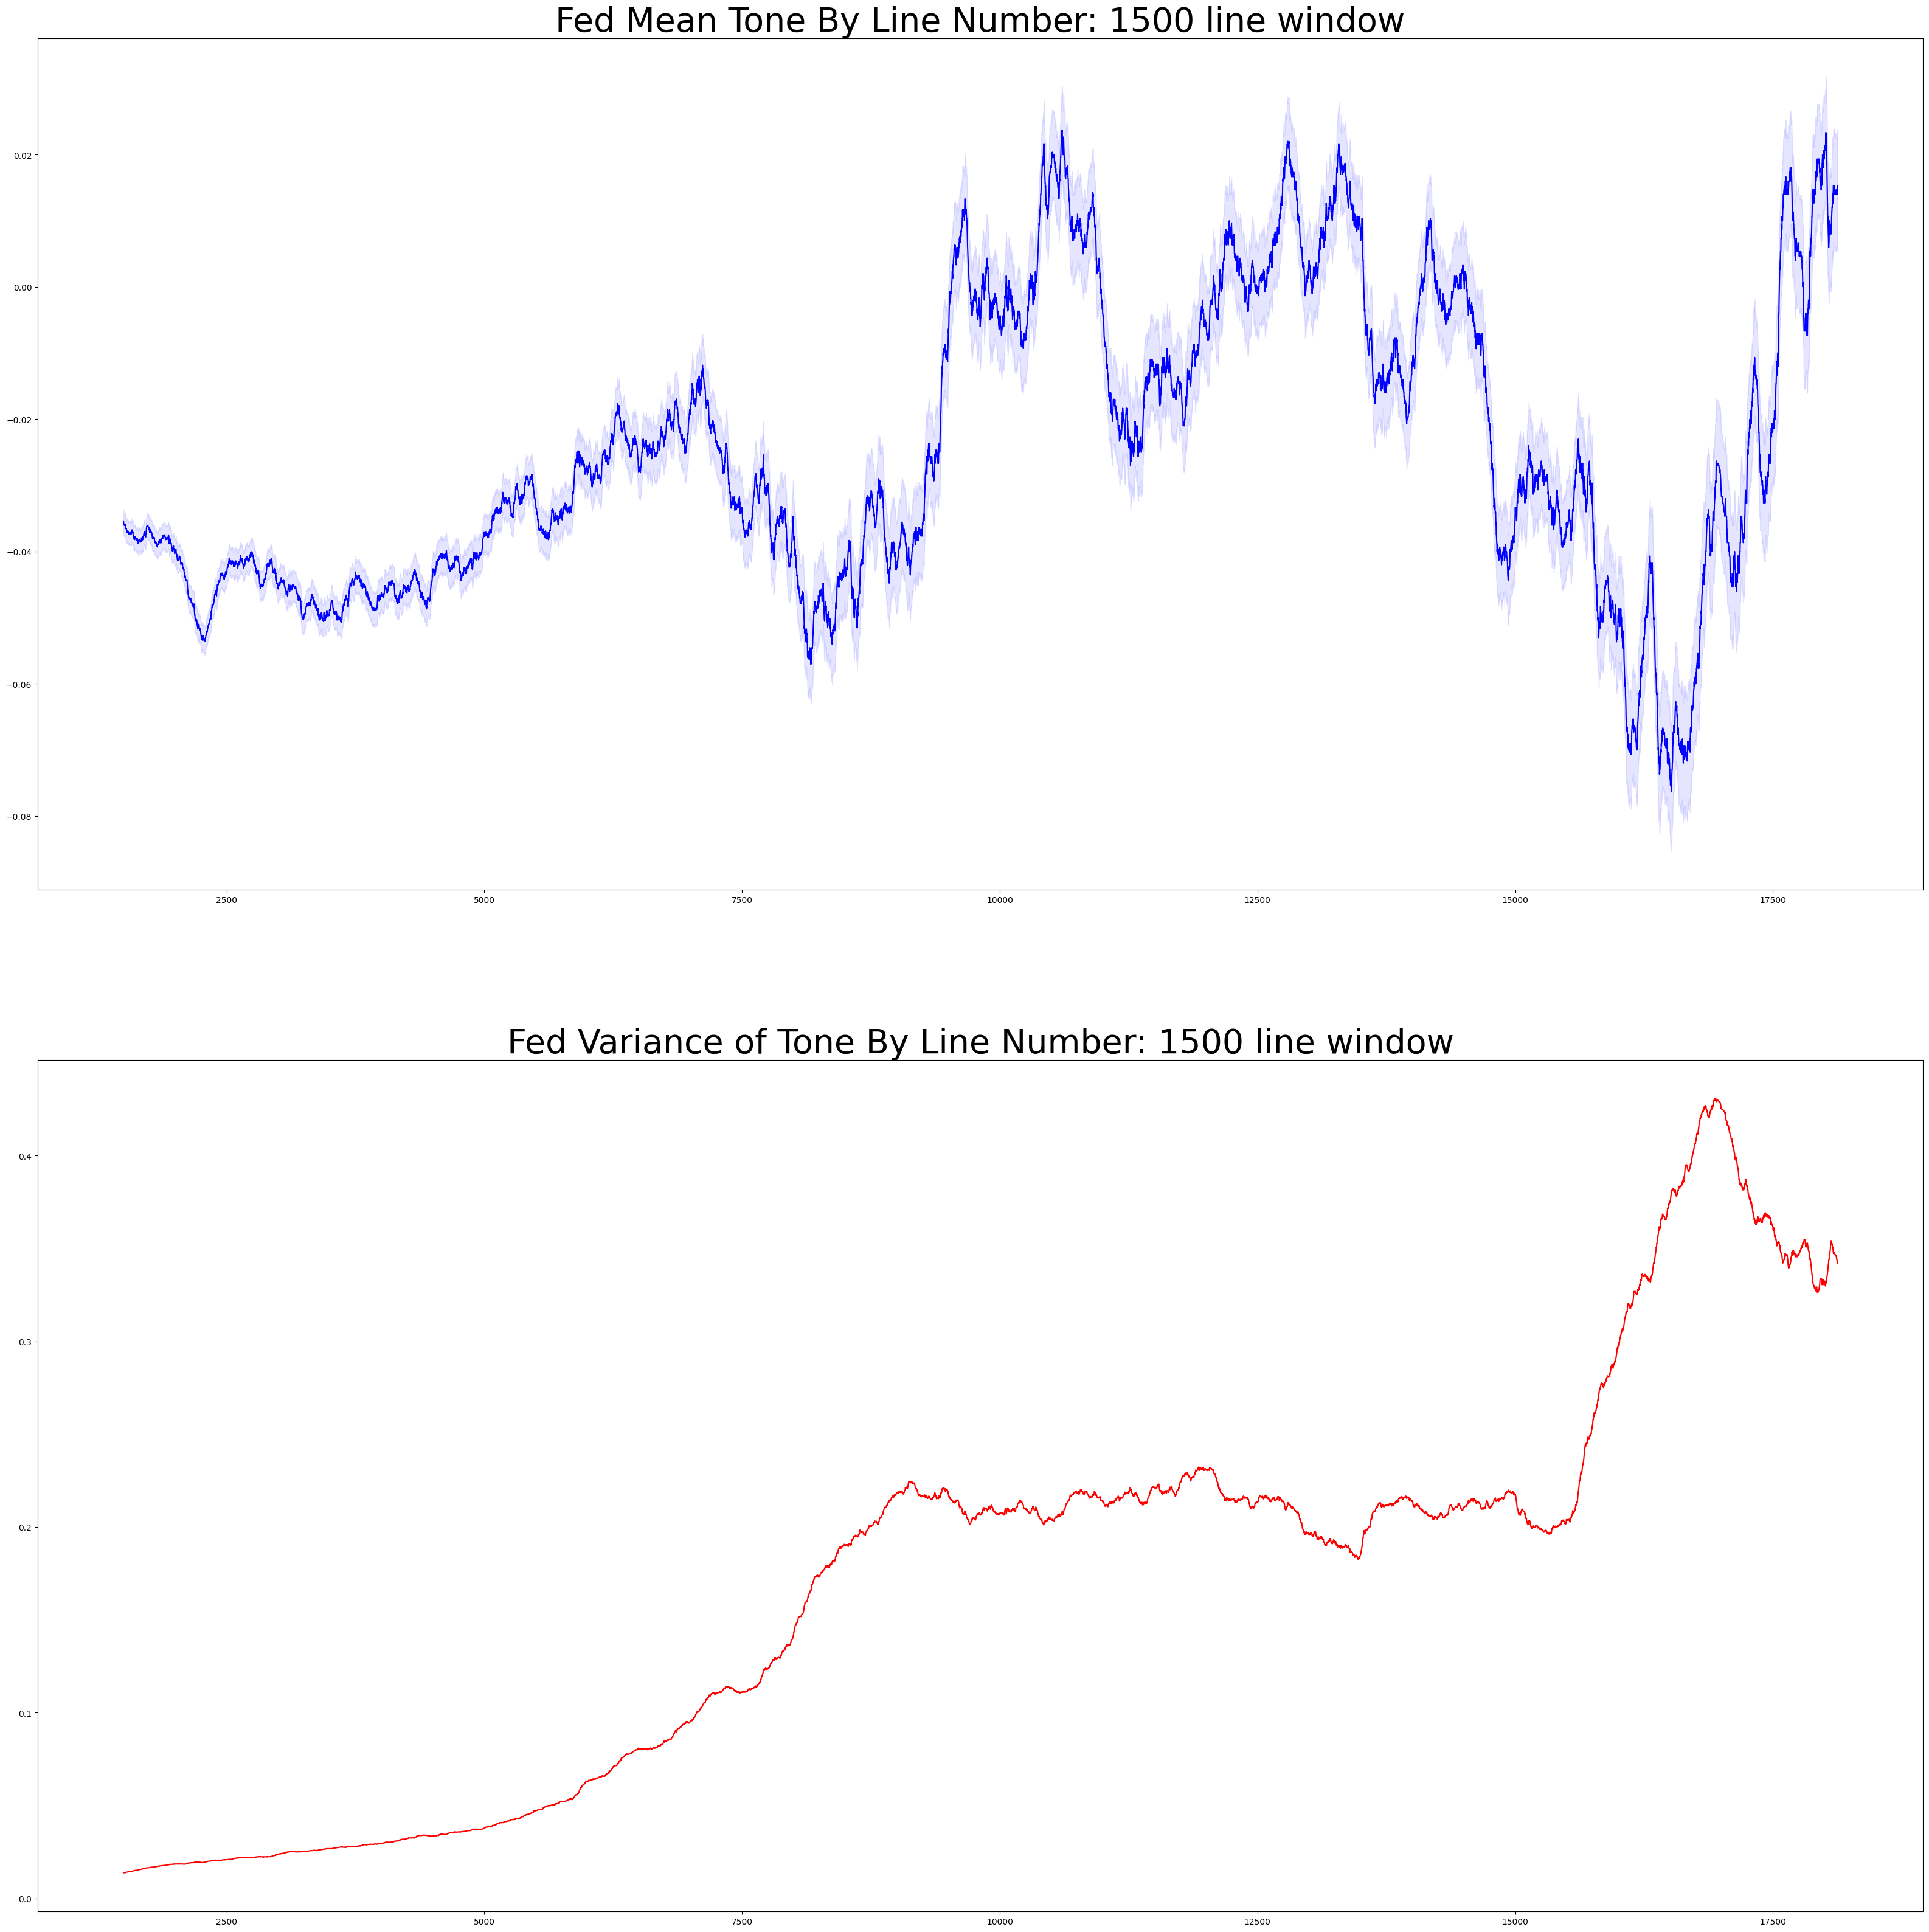

In [211]:



# Create a list of x-axis tick positions
# num_ticks = 200  # Adjust this number as needed
# x_tick_positions_0 = pivot['date'].iloc[::len(df) // num_ticks].tolist()
# x_tick_positions_1 = pivot['date'].iloc[::len(df) // num_ticks].tolist()

fig, axs = plt.subplots(2, 1, figsize=(40, 40))
axs[0].plot(pivot['rmean'], color='blue', label='mean')
axs[0].fill_between(pivot.index, pivot['rmean'] - pivot['ci'], pivot['rmean'] + pivot['ci'], color='b', alpha=.1)

axs[1].plot(pivot['rvar'], color='red', label='var')

axs[0].set_title(f'{Body} Mean Tone By Line Number: {window} line window', fontsize=40)
axs[1].set_title(f'{Body} Variance of Tone By Line Number: {window} line window', fontsize=40)

plt.show()

In [212]:
df_sent_2 = df_sent_2[['title', 'sentiment']]
df_sent_2['dup_number'] = df_sent_2.groupby(['title']).cumcount()+1


print(df_sent_2.head())
#pivot = df_sent.pivot(index='title', columns='dup_number', values ='sentiment')
#pivot_2 = pd.pivot_table(df_sent_2, index='title', columns='dup_number', values ='sentiment', fill_value=0)
pivot_2 = pd.pivot_table(df_sent_2, index='dup_number', columns='title', values ='sentiment', fill_value=None)


                                  title  sentiment  dup_number
0  Financial stability in the euro area          0           1
1  Financial stability in the euro area          0           2
2  Financial stability in the euro area          0           3
3  Financial stability in the euro area          1           4
4  Financial stability in the euro area          1           5


In [213]:
pivot_2['mean'] = pivot_2.mean(axis=1)
pivot_2['var'] = pivot_2.var(axis=1)

window = 250

pivot_2['rmean'] = pivot_2['mean'].rolling(window).mean()
pivot_2['rvar'] = pivot_2['mean'].rolling(window).var()
pivot_2['ci'] = 1.96 * np.sqrt(pivot_2['rvar'] / len(pivot_2['rvar']))

#print(df_group.groupby('period')[['tone', 'rvar']].describe())

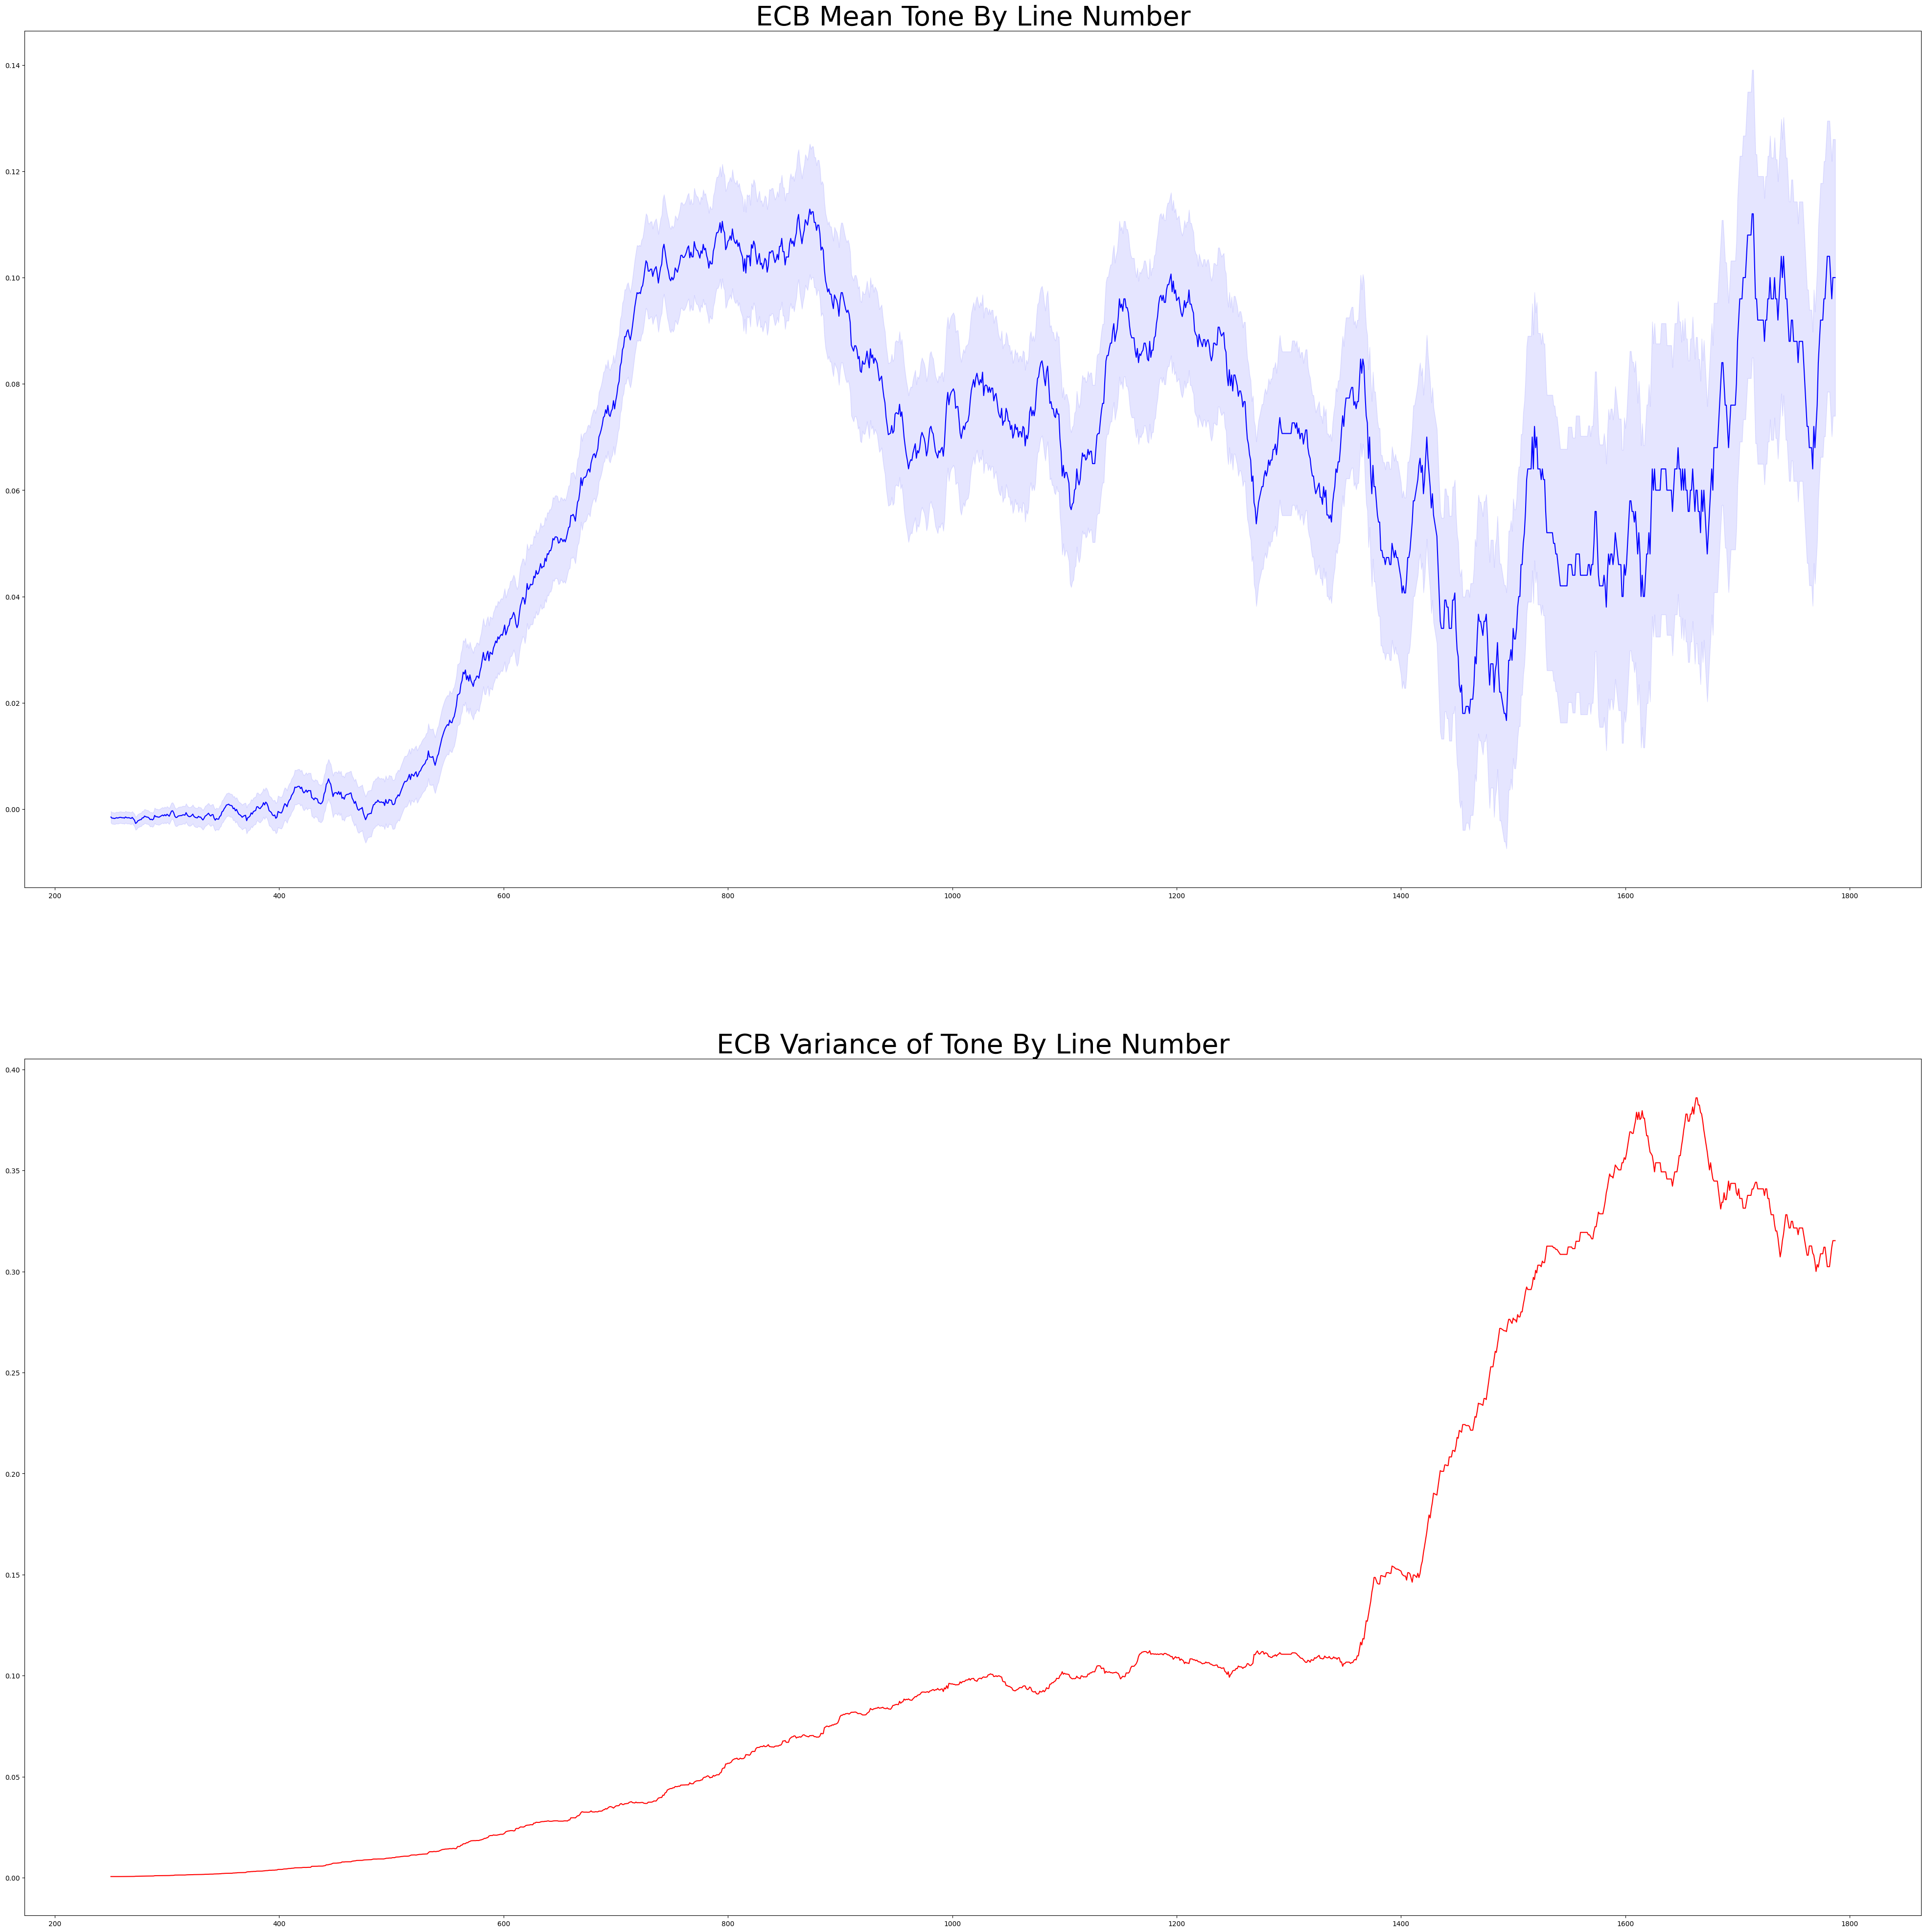

In [214]:
# pivot_2['mean'] = pivot_2.mean(axis=1)
# pivot_2['var'] = pivot_2.var(axis=1)


# Create a list of x-axis tick positions
# num_ticks = 200  # Adjust this number as needed
# x_tick_positions_0 = pivot['date'].iloc[::len(df) // num_ticks].tolist()
# x_tick_positions_1 = pivot['date'].iloc[::len(df) // num_ticks].tolist()

pivot_2['ci'] = 1.96 * np.sqrt(pivot_2['rvar'] / len(pivot_2['rvar']))

fig, axs = plt.subplots(2, 1, figsize=(50, 50))
axs[0].plot(pivot_2['rmean'], color='blue', label='mean')
axs[0].fill_between(pivot_2.index, pivot_2['rmean'] - pivot_2['ci'], pivot_2['rmean'] + pivot_2['ci'], color='b', alpha=.1)


axs[1].plot(pivot_2['rvar'], color='red', label='rvar')

axs[0].set_title(f'{Body_2} Mean Tone By Line Number', fontsize=40)
axs[1].set_title(f'{Body_2} Variance of Tone By Line Number', fontsize=40)

plt.show()

In [215]:
df_group = df.copy(deep=True)
meta_temp = df.copy(deep=True)

df_group_2 = df_2.copy(deep=True)
meta_temp_2 = df_2.copy(deep=True)

In [216]:
tdate = df_group['date'].tolist()

dout = []
for date in tdate:

    if '1998-06-1' <= date < '2000-06-01':
        dout.append([date, 1])
    
    if '2000-06-1' <= date < '2002-06-01':
        dout.append([date, 2])
        
    if '2002-06-1' <= date < '2004-06-01':
        dout.append([date, 3])
    
    if '2004-06-1' <= date < '2006-06-01':
        dout.append([date, 4])
        
    if '2006-06-1' <= date < '2008-06-01':
        dout.append([date, 5])
        
    if '2008-06-1' <= date < '2010-06-01':
        dout.append([date, 6])
        
    if '2010-06-1' <= date < '2012-06-01':
        dout.append([date, 7])
        
    if '2012-06-1' <= date < '2014-06-01':
        dout.append([date, 8])
        
    if '2014-06-1' <= date < '2016-06-01':
        dout.append([date, 9])
        
    if '2016-06-1' <= date < '2018-06-01':
        dout.append([date, 10])
        
    if '2018-06-1' <= date < '2020-06-01':
        dout.append([date, 11])
        
    if '2020-06-1' <= date < '2022-06-01':
        dout.append([date, 12])
        
    if '2022-06-1' <= date < '2024-06-01':
        dout.append([date, 13])
        
print(dout)
df_dates = pd.DataFrame(dout, columns=['date', 'period'])
df_group = df_group.merge(df_dates, on='date', how='inner')
df_group = df_group.drop_duplicates()

df_group = df_group.sort_values(by=['period', 'date'], ascending=True)
print(df_group.head())
    

[['1998-11-12', 1], ['1998-11-06', 1], ['1998-11-05', 1], ['1998-10-29', 1], ['1998-10-27', 1], ['1998-10-22', 1], ['1998-10-22', 1], ['1998-10-22', 1], ['1998-10-16', 1], ['1998-10-14', 1], ['1998-10-05', 1], ['2000-10-19', 2], ['2000-04-12', 1], ['1998-09-29', 1], ['1998-09-28', 1], ['1998-09-18', 1], ['1998-09-17', 1], ['1998-09-15', 1], ['1998-09-04', 1], ['1998-07-20', 1], ['1998-07-10', 1], ['1998-07-09', 1], ['1998-06-18', 1], ['1999-12-15', 1], ['1999-11-30', 1], ['1999-11-15', 1], ['1999-11-04', 1], ['1999-11-02', 1], ['1999-10-28', 1], ['1999-10-28', 1], ['1999-10-19', 1], ['1999-10-15', 1], ['1999-10-14', 1], ['1999-10-12', 1], ['1999-10-11', 1], ['1999-10-06', 1], ['1999-10-01', 1], ['1999-09-30', 1], ['1999-06-02', 1], ['1999-09-28', 1], ['1999-09-27', 1], ['1999-09-27', 1], ['1999-09-21', 1], ['1999-09-17', 1], ['1999-09-17', 1], ['1999-09-16', 1], ['1999-09-15', 1], ['1999-09-09', 1], ['1999-09-08', 1], ['1999-09-08', 1], ['1999-08-27', 1], ['1999-07-29', 1], ['1999-06-2

In [217]:
tdate_2 = df_group_2['date'].tolist()

dout_2 = []
for date in tdate_2:

    if '1998-06-01' <= date < '2000-06-01':
        dout_2.append([date, 1])
    
    if '2000-06-01' <= date < '2002-06-01':
        dout_2.append([date, 2])
        
    if '2002-06-01' <= date < '2004-06-01':
        dout_2.append([date, 3])
    
    if '2004-06-01' <= date < '2006-06-01':
        dout_2.append([date, 4])
        
    if '2006-06-01' <= date < '2008-06-01':
        dout_2.append([date, 5])
        
    if '2008-06-01' <= date < '2010-06-01':
        dout_2.append([date, 6])
        
    if '2010-06-01' <= date < '2012-06-01':
        dout_2.append([date, 7])
        
    if '2012-06-01' <= date < '2014-06-01':
        dout_2.append([date, 8])
        
    if '2014-06-01' <= date < '2016-06-01':
        dout_2.append([date, 9])
        
    if '2016-06-01' <= date < '2018-06-01':
        dout_2.append([date, 10])
        
    if '2018-06-01' <= date < '2020-06-01':
        dout_2.append([date, 11])
        
    if '2020-06-01' <= date < '2022-06-01':
        dout_2.append([date, 12])
        
    if '2022-06-01' <= date < '2024-06-01':
        dout_2.append([date, 13])
        
print(dout_2)
df_dates_2 = pd.DataFrame(dout_2, columns=['date', 'period'])
df_group_2 = df_group_2.merge(df_dates_2, on='date', how='inner')
df_group_2 = df_group_2.drop_duplicates()

df_group_2 = df_group_2.sort_values(by=['period', 'date'], ascending=True)
print(df_group_2.head())
    

[['2023-06-01', 13], ['2023-06-01', 13], ['2023-05-25', 13], ['2023-05-24', 13], ['2023-05-23', 13], ['2023-05-19', 13], ['2023-05-17', 13], ['2023-05-16', 13], ['2019-11-04', 11], ['2023-05-05', 13], ['2023-04-24', 13], ['2023-04-24', 13], ['2023-04-21', 13], ['2023-04-19', 13], ['2023-04-17', 13], ['2023-04-14', 13], ['2022-10-14', 13], ['2022-04-21', 12], ['2020-10-15', 12], ['2020-04-16', 11], ['2019-10-18', 11], ['2019-04-12', 11], ['2018-10-12', 11], ['2018-04-20', 10], ['2017-10-13', 10], ['2017-04-21', 10], ['2016-10-07', 10], ['2016-04-15', 9], ['2023-04-01', 13], ['2022-11-14', 13], ['2023-03-27', 13], ['2023-03-27', 13], ['2023-03-22', 13], ['2023-03-22', 13], ['2023-03-20', 13], ['2022-11-28', 13], ['2022-09-26', 13], ['2022-06-20', 13], ['2022-02-07', 12], ['2019-01-28', 11], ['2018-11-26', 11], ['2018-09-24', 11], ['2018-07-09', 11], ['2018-02-26', 10], ['2017-11-20', 10], ['2017-09-25', 10], ['2017-05-29', 10], ['2017-02-06', 10], ['2016-11-28', 10], ['2016-09-26', 10], 

In [218]:
print(df_group.groupby('period')['tone'].describe())

        count  mean  std   min   25%  50%  75%  max
period                                             
1      126.00  0.25 0.67 -1.00  0.00 0.00 1.00 1.00
2      115.00  0.23 0.66 -1.00  0.00 0.00 1.00 1.00
3      168.00  0.14 0.62 -1.00  0.00 0.00 1.00 1.00
4      158.00  0.25 0.59 -1.00  0.00 0.00 1.00 1.00
5      143.00  0.08 0.64 -1.00  0.00 0.00 0.50 1.00
6      115.00 -0.12 0.76 -1.00 -1.00 0.00 0.00 1.00
7       93.00  0.05 0.68 -1.00  0.00 0.00 1.00 1.00
8       92.00  0.09 0.57 -1.00  0.00 0.00 0.00 1.00
9       88.00  0.17 0.55 -1.00  0.00 0.00 0.25 1.00
10     102.00  0.22 0.62 -1.00  0.00 0.00 1.00 1.00
11     119.00  0.33 0.55 -1.00  0.00 0.00 1.00 1.00
12     112.00  0.30 0.61 -1.00  0.00 0.00 1.00 1.00
13      70.00  0.14 0.57 -1.00  0.00 0.00 0.00 1.00


In [219]:
print(df_group_2.groupby('period')['tone'].describe())

        count  mean  std   min  25%  50%  75%  max
period                                            
1      148.00  0.19 0.39  0.00 0.00 0.00 0.00 1.00
2      144.00  0.15 0.37 -1.00 0.00 0.00 0.00 1.00
3      134.00  0.07 0.36 -1.00 0.00 0.00 0.00 1.00
4      172.00  0.15 0.35  0.00 0.00 0.00 0.00 1.00
5      230.00  0.20 0.42 -1.00 0.00 0.00 0.00 1.00
6      239.00  0.08 0.53 -1.00 0.00 0.00 0.00 1.00
7      220.00  0.06 0.40 -1.00 0.00 0.00 0.00 1.00
8      235.00  0.03 0.44 -1.00 0.00 0.00 0.00 1.00
9      202.00 -0.01 0.46 -1.00 0.00 0.00 0.00 1.00
10     271.00  0.13 0.53 -1.00 0.00 0.00 0.00 1.00
11     195.00  0.09 0.57 -1.00 0.00 0.00 0.00 1.00
12     178.00 -0.01 0.48 -1.00 0.00 0.00 0.00 1.00
13      73.00  0.12 0.50 -1.00 0.00 0.00 0.00 1.00


In [220]:
df_group = df_group[['date', 'tone', 'sentiment_mean', 'sentiment_median', 'sentiment_var', 'period']]
df_group_2 = df_group_2[['date', 'tone', 'sentiment_mean', 'sentiment_median', 'sentiment_var', 'period']]

df_group = df_group.groupby('date', as_index = False, dropna=True).mean()
df_group_2 = df_group_2.groupby('date', as_index = False, dropna=True).mean()

In [221]:
window = 50

df_group['rmean'] = df_group['tone'].rolling(window).mean()
df_group['rvar'] = df_group['tone'].rolling(window).var()
df_group['ci'] = 1.96 * np.sqrt(df_group['rvar'] / len(df_group['rvar']))

#print(df_group.groupby('period')[['tone', 'rvar']].describe())

In [222]:
df_group_2['rmean'] = df_group_2['tone'].rolling(window).mean()
df_group_2['rvar'] = df_group_2['tone'].rolling(window).var()
df_group_2['ci'] = 1.96 * np.sqrt(df_group_2['rvar'] / len(df_group_2['rvar']))


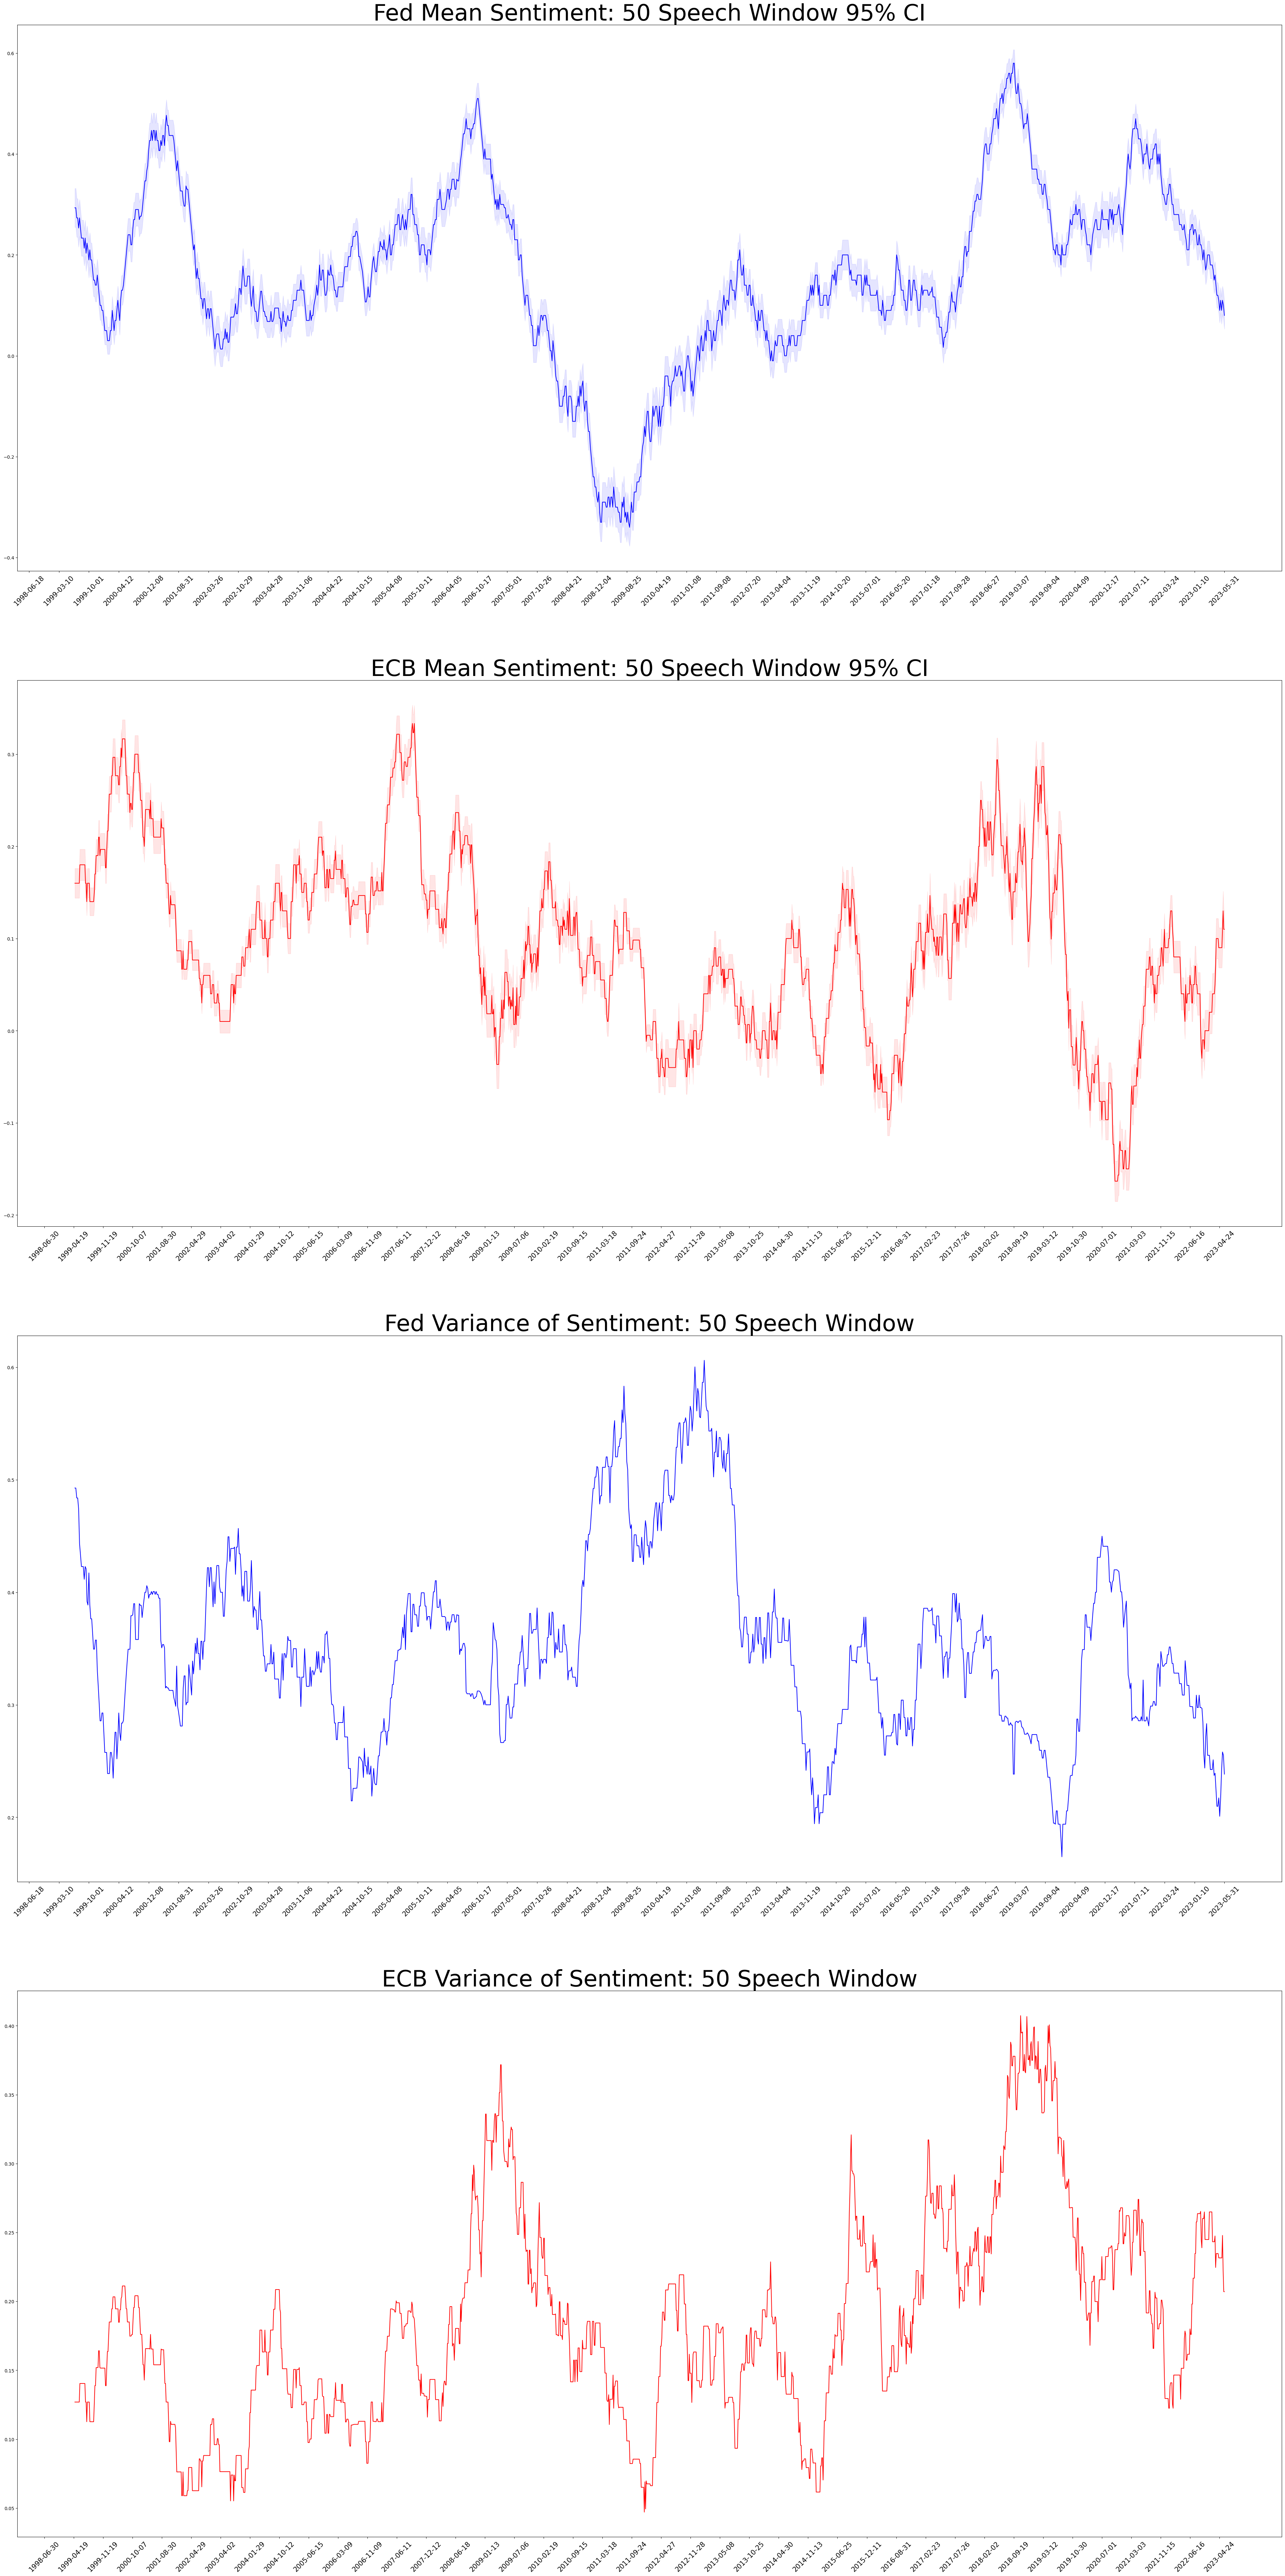

In [223]:

# Create a list of x-axis tick positions
num_ticks = 40  # Adjust this number as needed
x_tick_positions_0 = df_group['date'].iloc[::len(df_group) // num_ticks].tolist()
x_tick_positions_1 = df_group_2['date'].iloc[::len(df_group_2) // num_ticks].tolist()

fig, axs = plt.subplots(4, 1, figsize=(50, 100))

axs[0].plot(df_group['date'], df_group['rmean'], color='blue')
axs[0].fill_between(df_group['date'], df_group['rmean'] - df_group['ci'], df_group['rmean'] + df_group['ci'], color='b', alpha=.1)
axs[2].plot(df_group['date'], df_group['rvar'], color='blue')

axs[1].plot(df_group_2['date'], df_group_2['rmean'], color='red')
axs[1].fill_between(df_group_2['date'], df_group_2['rmean'] - df_group_2['ci'], df_group_2['rmean'] + df_group_2['ci'], color='r', alpha=.1)
axs[3].plot(df_group_2['date'], df_group_2['rvar'], color='red')

# Set x-axis ticks for both subplots
axs[0].set_xticks(x_tick_positions_0)
axs[1].set_xticks(x_tick_positions_1)
axs[2].set_xticks(x_tick_positions_0)
axs[3].set_xticks(x_tick_positions_1)

axs[0].tick_params(axis='x', rotation=45, labelsize=15)
axs[1].tick_params(axis='x', rotation=45, labelsize=15)
axs[2].tick_params(axis='x', rotation=45, labelsize=15)
axs[3].tick_params(axis='x', rotation=45, labelsize=15)

axs[0].set_title(f'{Body} Mean Sentiment: {window} Speech Window 95% CI', fontsize=50)
axs[1].set_title(f'{Body_2} Mean Sentiment: {window} Speech Window 95% CI', fontsize=50)
axs[2].set_title(f'{Body} Variance of Sentiment: {window} Speech Window', fontsize=50)
axs[3].set_title(f'{Body_2} Variance of Sentiment: {window} Speech Window', fontsize=50)

plt.show()

In [224]:
df_group['date'] = df_group['date'].str[0:7]
df_group_2['date'] = df_group_2['date'].str[0:7]

df_group = df_group.groupby('date', as_index = False, dropna=True).mean()
df_group_2 = df_group_2.groupby('date', as_index = False, dropna=True).mean()


In [225]:
df_merged = df_group.merge(df_group_2, on='date', how='inner', suffixes=(f'_{Body}', f'_{Body_2}'))
df_merged = df_merged.drop_duplicates()
df_merged['diff'] = df_merged[f'tone_{Body}'] - df_merged[f'tone_{Body_2}']

print(df_merged.head())
print(len(df_merged))

      date  tone_Fed  sentiment_mean_Fed  sentiment_median_Fed  \
0  1998-06      1.00               -0.10                  0.00   
1  1998-07      0.67               -0.16                  0.00   
2  1998-09      0.50               -0.03                  0.00   
3  1998-10     -0.06               -0.13                 -0.06   
4  1998-11      0.67               -0.06                  0.00   

   sentiment_var_Fed  period_Fed  rmean_Fed  rvar_Fed  ci_Fed  tone_ECB  \
0               0.65        1.00        NaN       NaN     NaN      0.00   
1               0.46        1.00        NaN       NaN     NaN      0.00   
2               0.46        1.00        NaN       NaN     NaN      0.00   
3               0.42        1.00        NaN       NaN     NaN      0.00   
4               0.42        1.00        NaN       NaN     NaN      0.38   

   sentiment_mean_ECB  sentiment_median_ECB  sentiment_var_ECB  period_ECB  \
0                0.15                  0.00               0.27        1.00

In [226]:
#df_merged.to_csv(f"{Sentiment_models}/{Body}_{Model}_vs_{Body_2}_{Model_2}_advanced_sentiment_texts.csv", index=False)

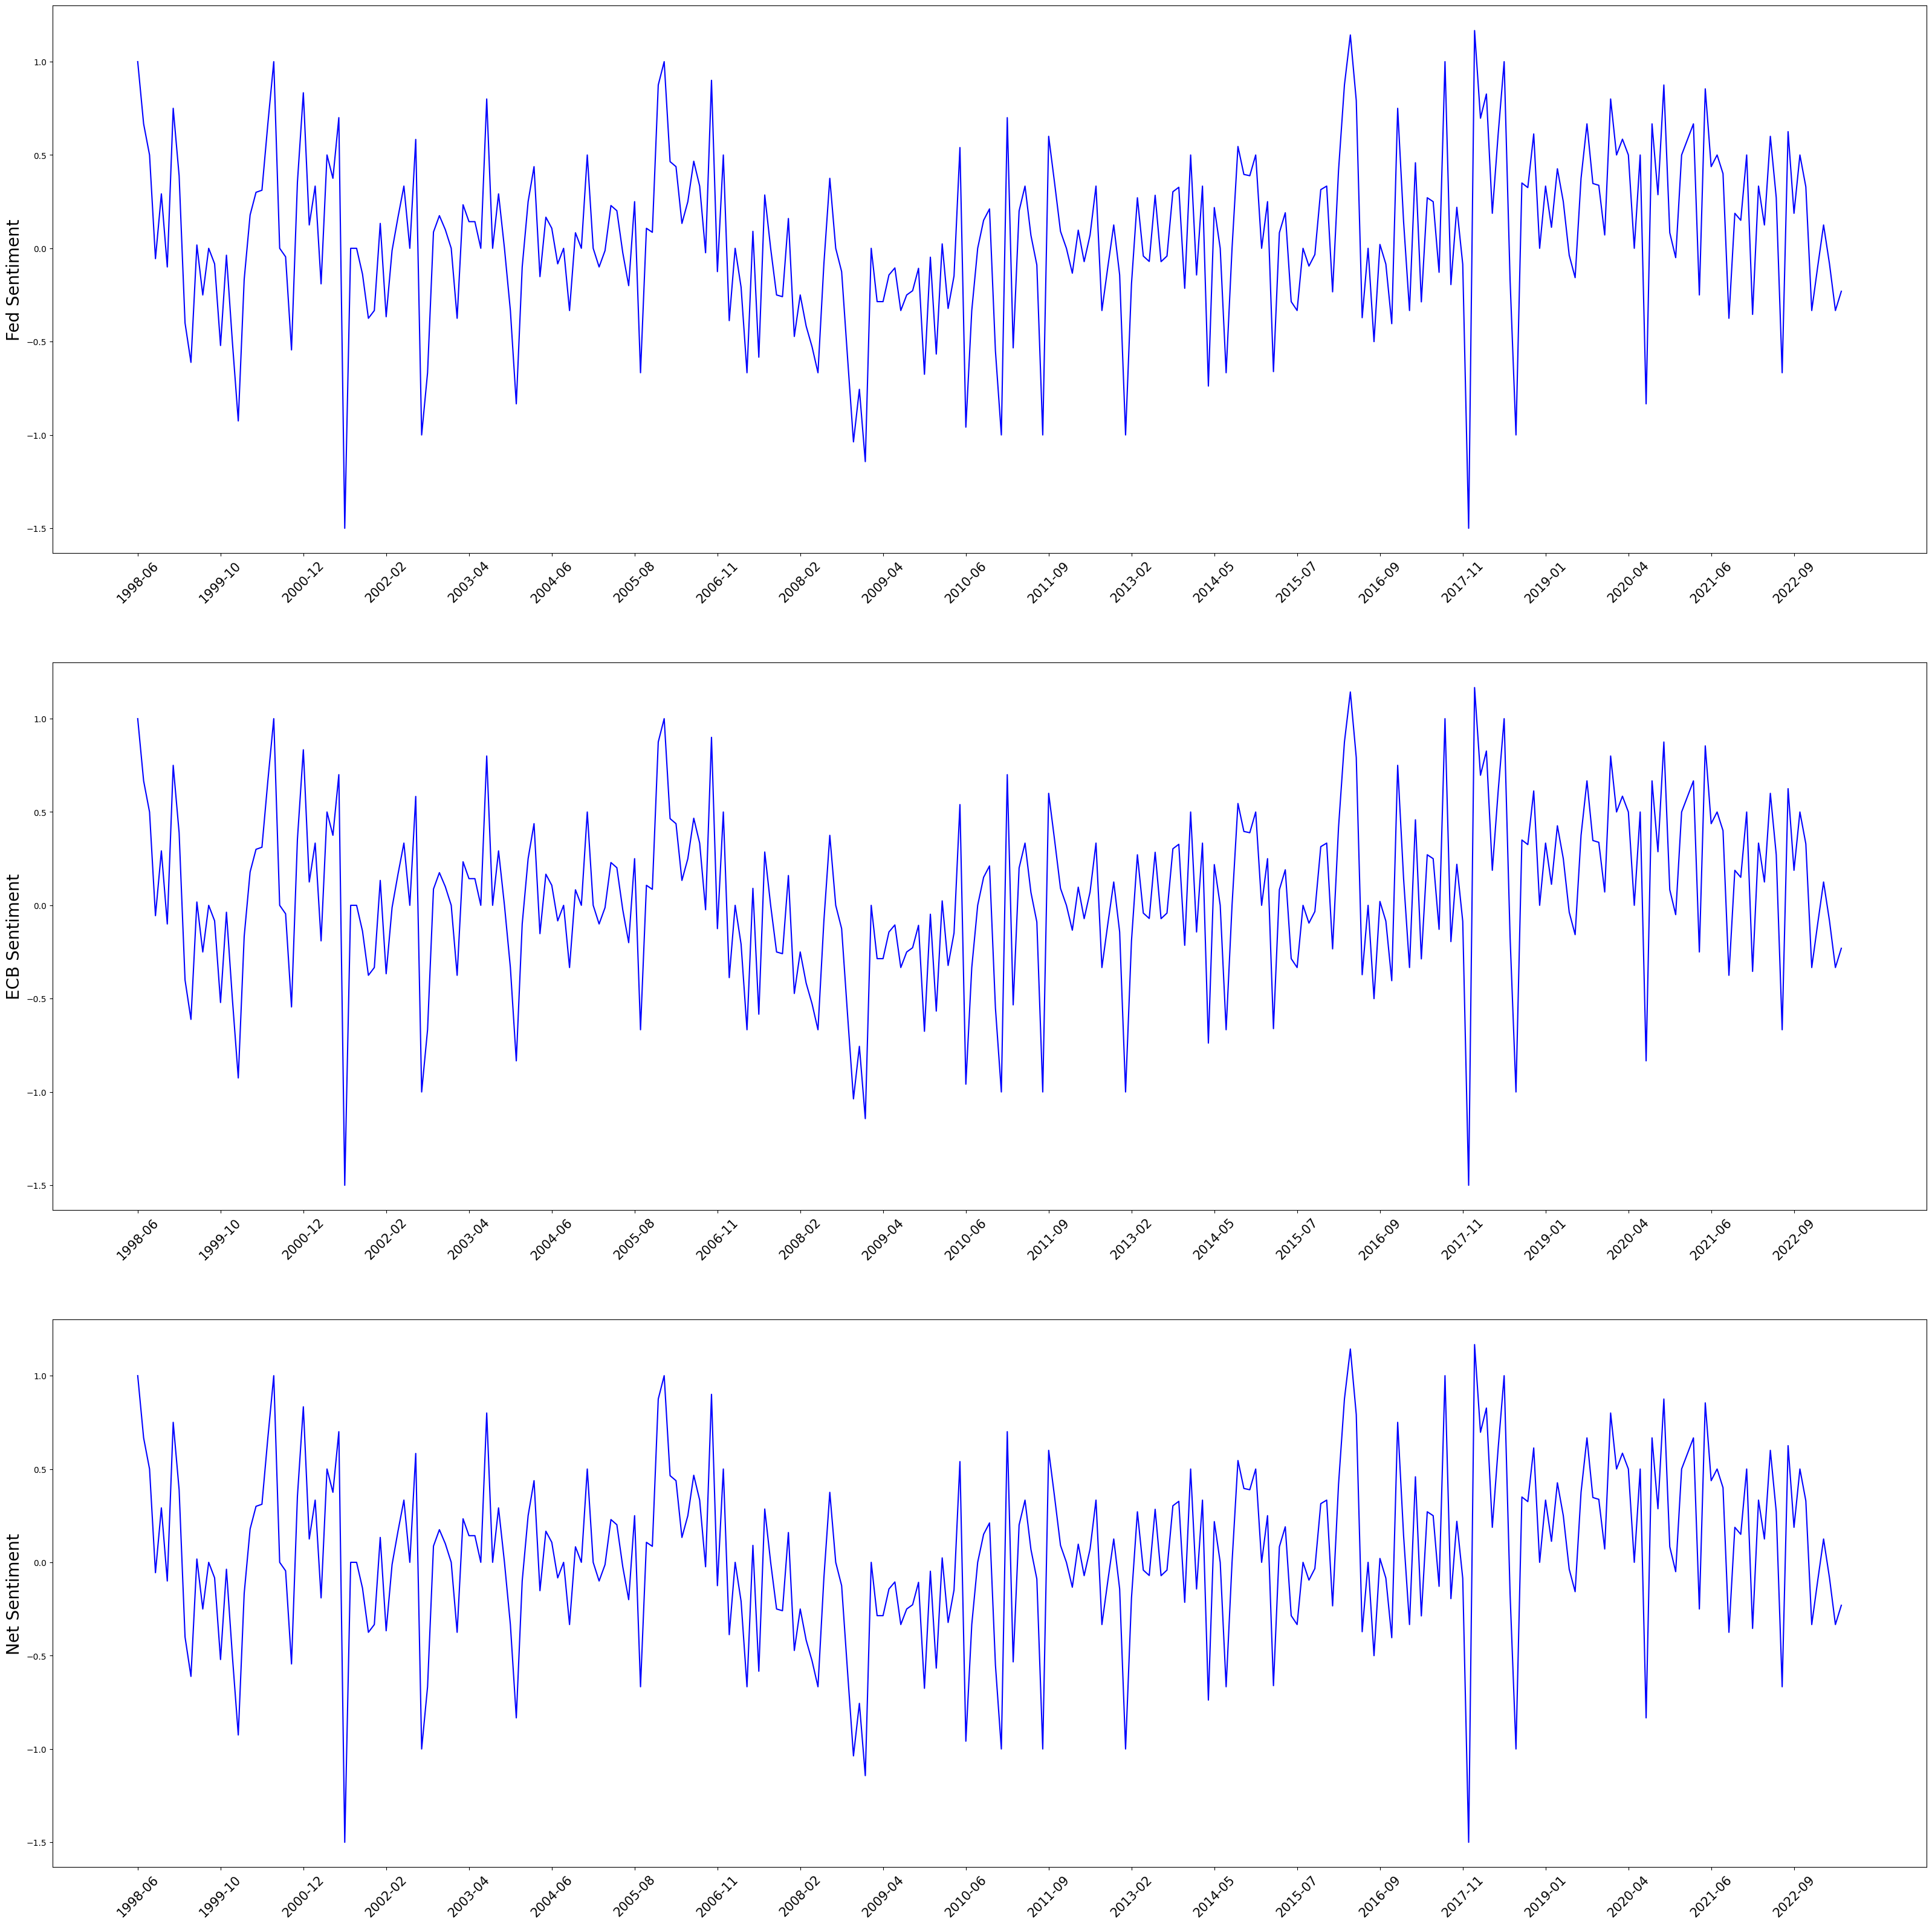

In [227]:

# Create a list of x-axis tick positions
num_ticks = 20  # Adjust this number as needed
x_tick_positions = df_merged['date'].iloc[::len(df_merged) // num_ticks].tolist()

fig, axs = plt.subplots(3, 1, figsize=(40, 40))

axs[0].plot(df_merged['date'], df_merged['diff'], color='blue', label='Tone')
axs[1].plot(df_merged['date'], df_merged['diff'], color='blue', label='Tone')
axs[2].plot(df_merged['date'], df_merged['diff'], color='blue', label='Tone')

# Set x-axis ticks for both subplots
axs[0].set_xticks(x_tick_positions)
axs[1].set_xticks(x_tick_positions)
axs[2].set_xticks(x_tick_positions)

axs[0].tick_params(axis='x', rotation=45, labelsize=15)
axs[1].tick_params(axis='x', rotation=45, labelsize=15)
axs[2].tick_params(axis='x', rotation=45, labelsize=15)

#axs[0].set_yticks(np.arange(-1, 1, .1))
#axs[1].set_yticks(np.arange(-1, 1, .1))
#axs[2].set_yticks(np.arange(-1, 1, .1))

axs[0].set_ylabel(f'{Body} Sentiment', fontsize=20)
axs[1].set_ylabel(f'{Body_2} Sentiment', fontsize=20)
axs[2].set_ylabel(f'Net Sentiment', fontsize=20)

plt.show()


KeyError: 'Fed_tone'

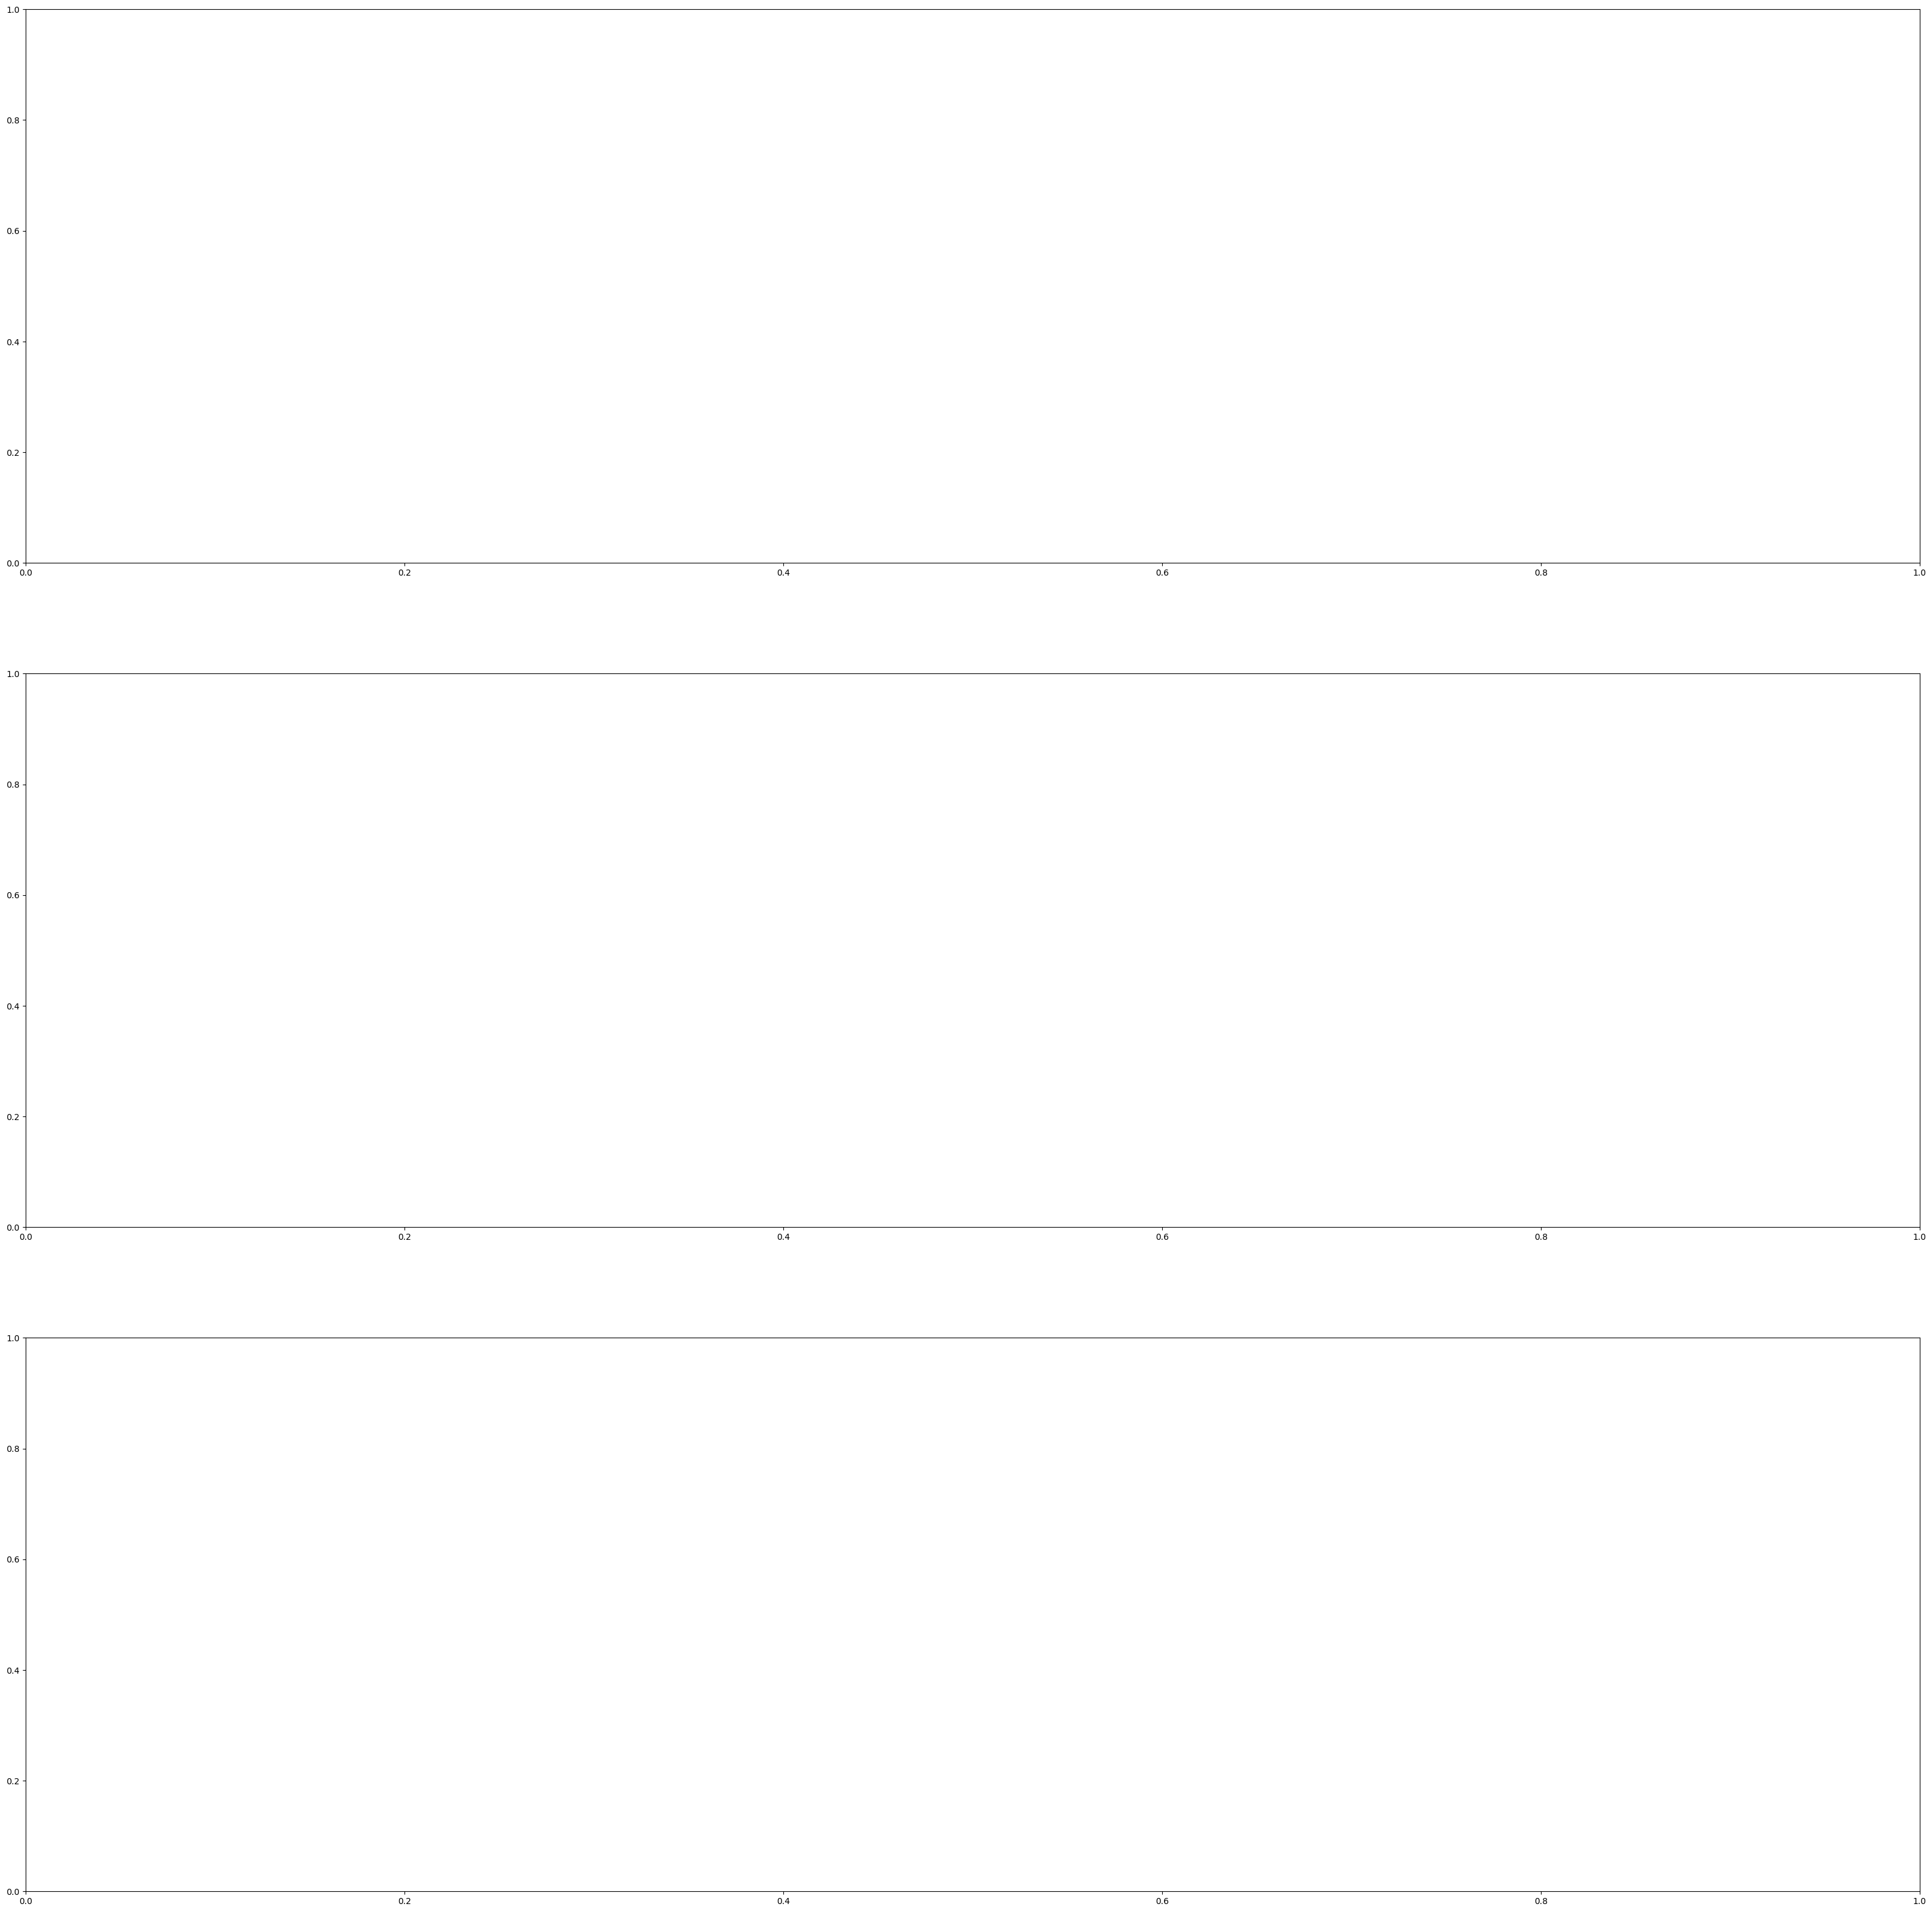

In [228]:
# Create a list of x-axis tick positions
num_ticks = 50  # Adjust this number as needed
x_tick_positions = df_merged['date'].iloc[::len(df_merged) // num_ticks].tolist()

y = 0

fig, axs = plt.subplots(3, 1, figsize=(40, 40))
axs[0].plot(df_merged['date'], df_merged[f'{Body}_tone'], color='blue', label='Net Tone')
axs[1].plot(df_merged['date'], df_merged[f'{Body_2}_tone'], color='red', label='Net Tone')
axs[0].hlines(y, df_merged['date'].min(), df_merged['date'].max(), color='black', label='Zero')
axs[1].hlines(y, df_merged['date'].min(), df_merged['date'].max(), color='black', label='Zero')

axs[2].plot(df_merged['date'], df_merged['net_diff_tone'], color='green', label='Net Sentiment')
axs[2].hlines(y, df_merged['date'].min(), df_merged['date'].max(), color='black', label='Zero')
# Set x-axis ticks for both subplots
axs[0].set_xticks(x_tick_positions)
axs[1].set_xticks(x_tick_positions)
axs[2].set_xticks(x_tick_positions)

axs[0].tick_params(axis='x', rotation=45, labelsize=15)
axs[1].tick_params(axis='x', rotation=45, labelsize=15)
axs[2].tick_params(axis='x', rotation=45, labelsize=15)

axs[1].set_yticks(np.arange(-1, 1, .1))
axs[0].set_yticks(np.arange(-1, 1, .1))
axs[2].set_yticks(np.arange(-1, 1, .1))

axs[0].set_ylabel(f'{Body} Tone Sentiment', fontsize=20)
axs[1].set_ylabel(f'{Body_2} Tone Sentiment', fontsize=20)
axs[2].set_ylabel(f'Net Tone Sentiment', fontsize=20)

plt.show()

In [ ]:
print(len(df_merged))
df_merged.to_csv(f"{Sentiment_models}/{Body}_{Model}_vs_{Body_2}_{Model_2}_advanced_sentiment_texts.csv", index=False)
print(f"{Sentiment_models}/{Body}_{Model}_vs_{Body_2}_{Model_2}_advanced_sentiment_texts.csv")